In [112]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cbsyst as cb
import statsmodels as sm
from statsmodels.api import OLS

In [113]:
filename='WCOA2013_hy1.csv'
df = pd.read_csv(filename,header=31,
                na_values=-999,
                parse_dates=[[8,9]])

In [114]:
Csw = cb.Csys(pH=df['PH_TOT'],
             TA=df['ALKALI'],
             T=df['CTDTMP'],
             S=df['CTDSAL'],
             P=df['CTDPRS'])

In [115]:
OmegaA = Csw['Ca']*Csw['CO3']/(Csw.Ks['KspA']*1e6)

In [116]:
df['OmegaA'] = OmegaA

In [117]:
#Data below 30m and above 300m
ii = ((df['CTDPRS'] > 30) & (df['CTDPRS'] < 300) & np.isfinite(df['OmegaA'])
      & np.isfinite(df['CTDTMP']) & np.isfinite(df['CTDSAL']) & np.isfinite(df['CTDPRS'])
      & np.isfinite(df['OXYGEN']) & np.isfinite(df['NITRAT']))

In [118]:
#response variable y:
y=np.array(df['OmegaA'][ii])

#Data for design matrix:
T=df['CTDTMP'][ii]
S=df['CTDSAL'][ii]
p=df['CTDPRS'][ii]
O2=df['OXYGEN'][ii]
N=df['NITRAT'][ii]

<IPython.core.display.Javascript object>


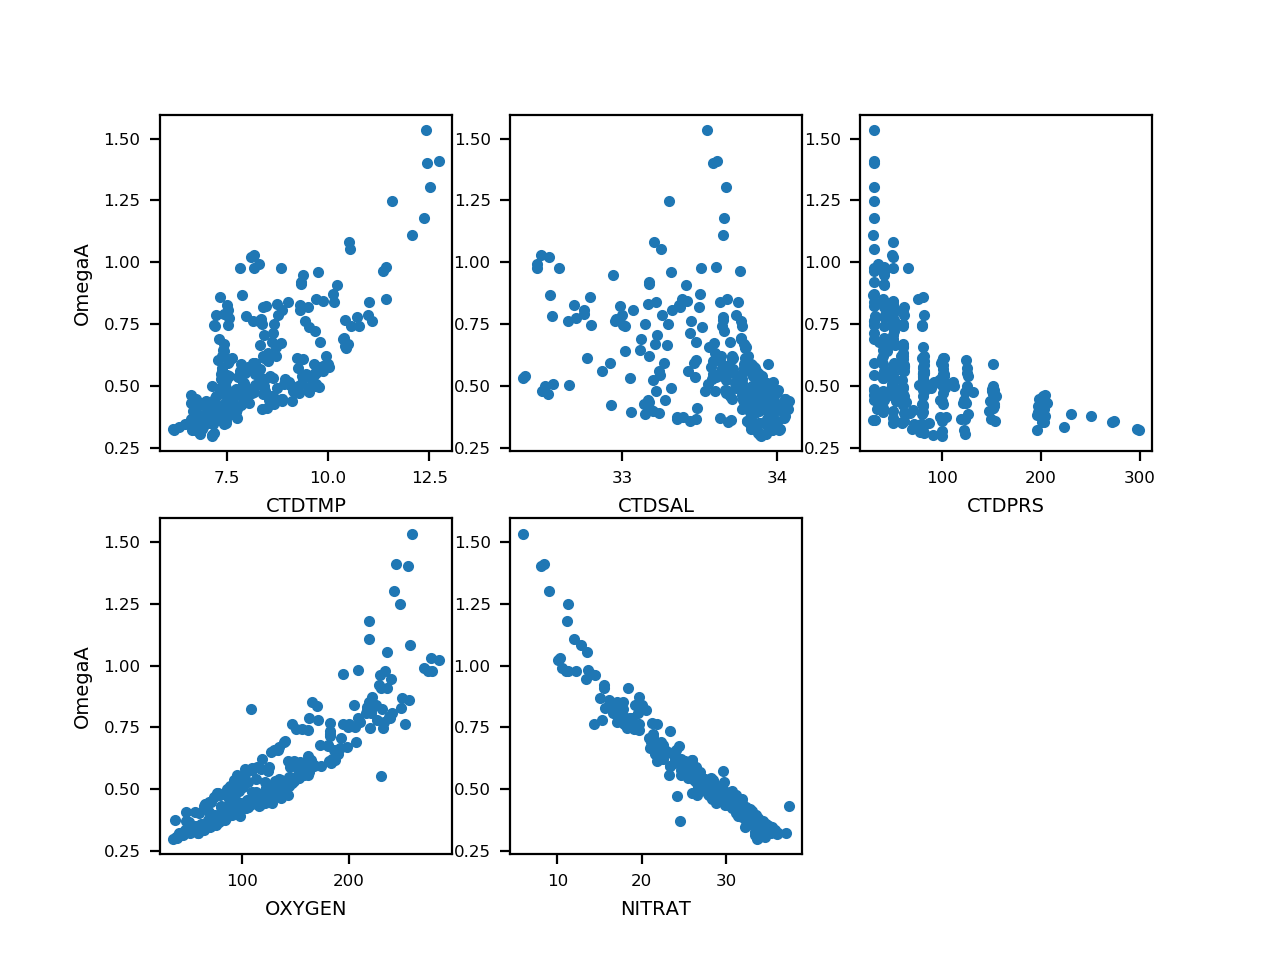

In [119]:
vars_to_plot=(['CTDTMP','CTDSAL','CTDPRS','OXYGEN','NITRAT'])
plt.figure()
counter=0

for var in vars_to_plot:
    counter = counter + 1
    plt.subplot(2,3,counter)
    plt.plot(df[var][ii],y,'.')
    plt.xlabel(var,fontsize=7)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    if counter == 1:
        plt.ylabel('OmegaA',fontsize=7)
    if counter == 4:
        plt.ylabel('OmegaA',fontsize=7)

In [120]:
#Model 1: OmegaA = c0 + c1 x T + c2 x S + c3 x P + c5 x O + c6 x N

X=np.ones([len(y),6])

X[:,1]=T
X[:,2]=S
X[:,3]=p
X[:,4]=O2
X[:,5]=N

In [121]:
#coefficients for model 1 equation

c=np.linalg.lstsq(X,y)
c=c[0]
c

array([ -3.07750516e-01,   3.19305644e-02,   2.83171680e-02,
         1.99215122e-04,   1.13431498e-03,  -1.92288348e-02])

In [122]:
ymodel=c[0]+c[1]*T+c[2]*S+c[3]*p+c[4]*O2+c[5]*N

<IPython.core.display.Javascript object>


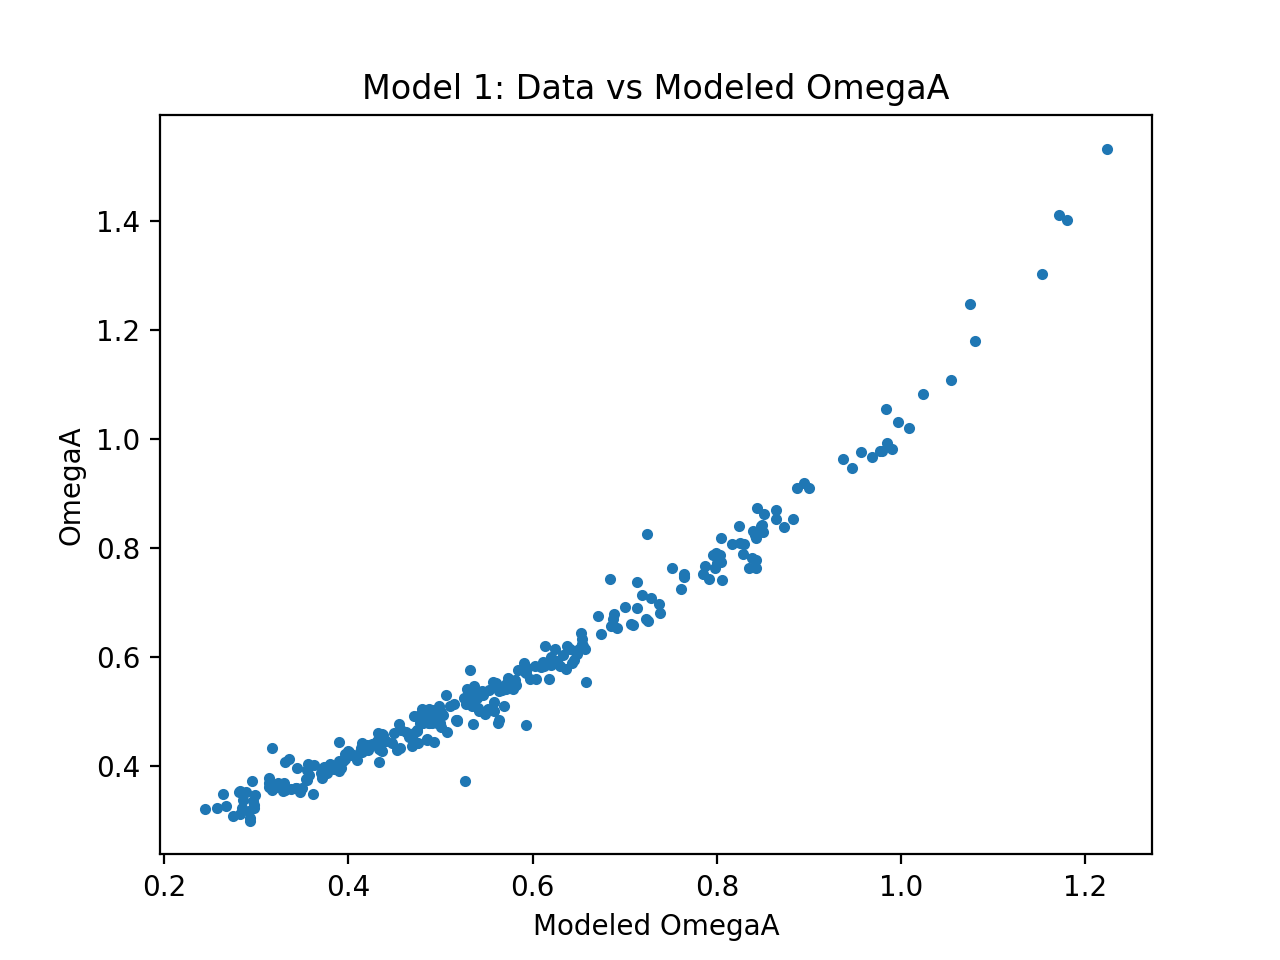

Text(0.5,1,'Model 1: Data vs Modeled OmegaA')

In [123]:
plt.figure()
plt.plot(ymodel,y,'.')
plt.xlabel('Modeled OmegaA')
plt.ylabel('OmegaA')
plt.title('Model 1: Data vs Modeled OmegaA')

In [124]:
residuals = ymodel-y

<IPython.core.display.Javascript object>


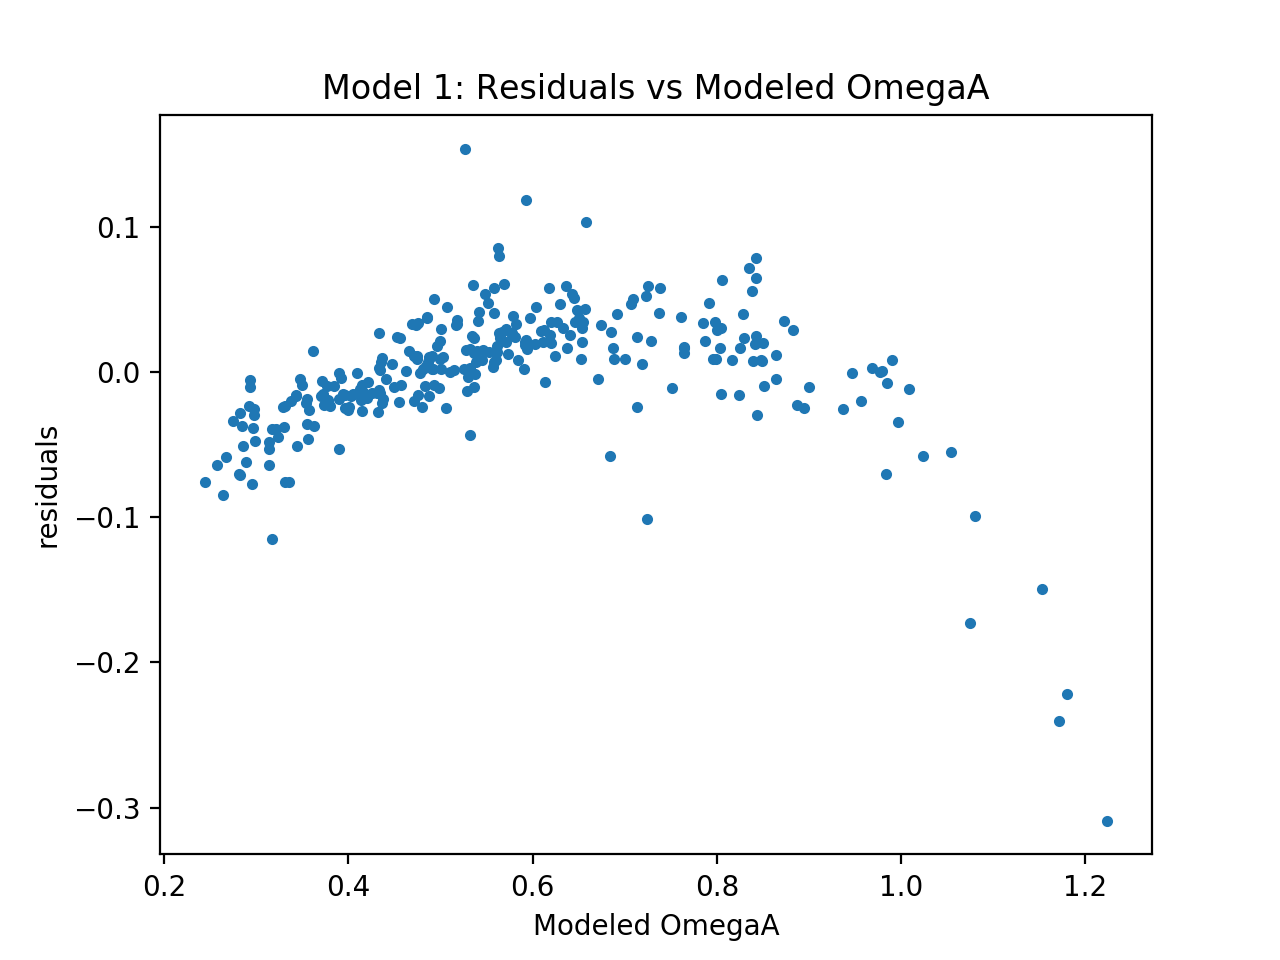

Text(0.5,1,'Model 1: Residuals vs Modeled OmegaA')

In [125]:
plt.figure()
plt.plot(ymodel,residuals,'.')
plt.xlabel('Modeled OmegaA')
plt.ylabel('residuals')
plt.title('Model 1: Residuals vs Modeled OmegaA')

In [126]:
#Model 2: OmegaA = c0 + c1 x (O - Oref) + c2 x (O - Oref)*(T - Tref)

Oref=140 #µmol/kg
Tref=8 #ºC

X2=np.ones([len(y),3])
X2[:,1]=(O2-Oref)
X2[:,2]=(O2-Oref)*(T-Tref)

In [127]:
#coefficients for model 2 equation

c2=np.linalg.lstsq(X2,y)
c2=c2[0]
c2

array([ 0.57416519,  0.00286187,  0.00063884])

In [128]:
ymodel2=c2[0] + c2[1]*(O2-Oref) + c2[2]*(O2-Oref)*(T-Tref)

In [129]:
residuals2 = ymodel2-y

<IPython.core.display.Javascript object>


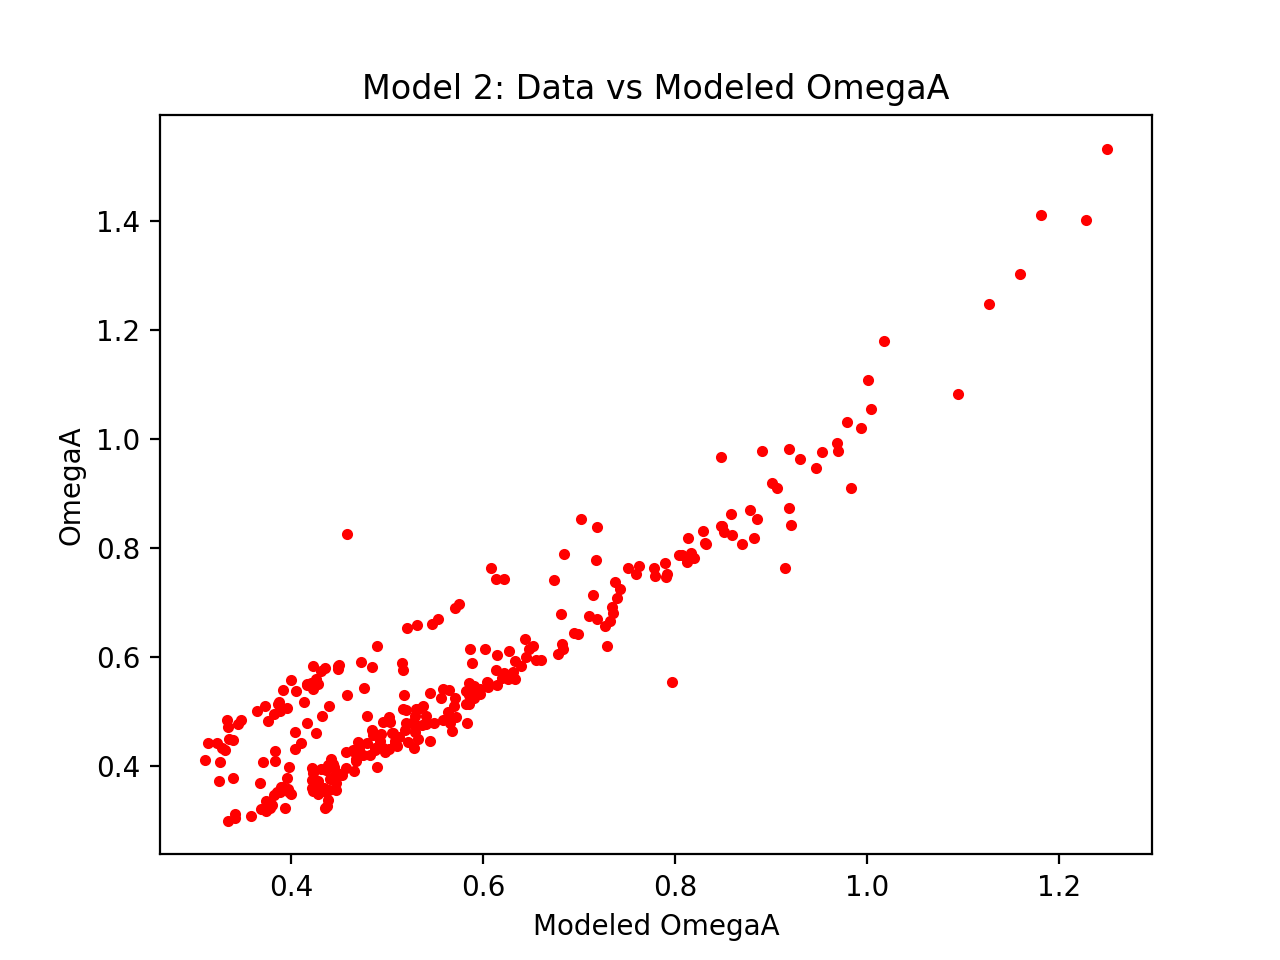

Text(0.5,1,'Model 2: Data vs Modeled OmegaA')

In [130]:
plt.figure()
plt.plot(ymodel2,y,'.r')
plt.xlabel('Modeled OmegaA')
plt.ylabel('OmegaA')
plt.title('Model 2: Data vs Modeled OmegaA')

<IPython.core.display.Javascript object>


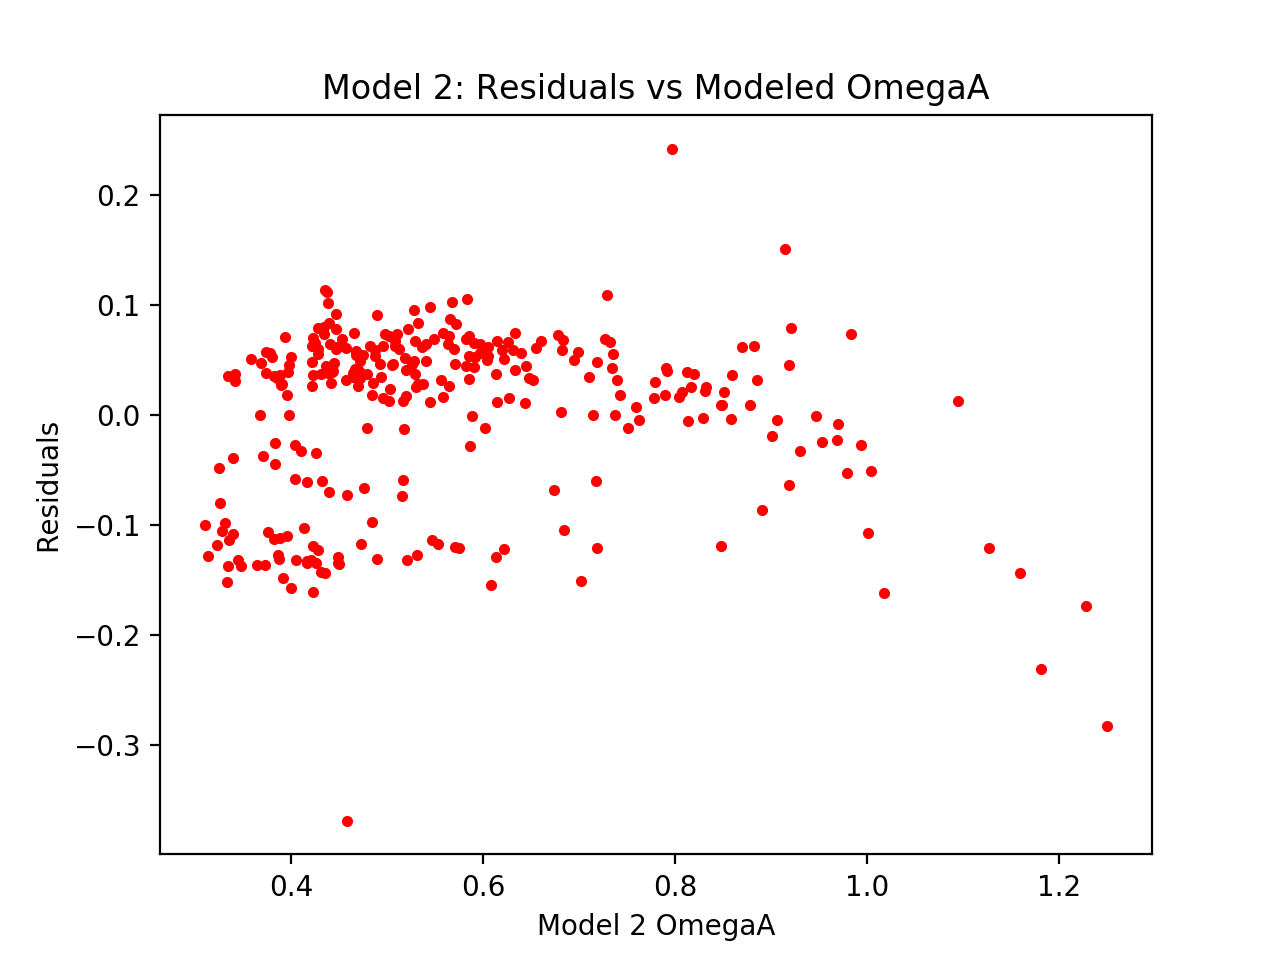

Text(0.5,1,'Model 2: Residuals vs Modeled OmegaA')

In [131]:
plt.figure()
plt.plot(ymodel2,residuals2,'.r')
plt.xlabel('Model 2 OmegaA')
plt.ylabel('Residuals')
plt.title('Model 2: Residuals vs Modeled OmegaA')

In [132]:
#Model 1 Summary of Regression Results and Statistical Tests

res=OLS(y,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     1073.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          4.64e-182
Time:                        23:19:06   Log-Likelihood:                 478.59
No. Observations:                 290   AIC:                            -945.2
Df Residuals:                     284   BIC:                            -923.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3078      0.354     -0.870      0.3

In [133]:
# Model 2 Summary of Regression Results and Statistical Tests

res=OLS(y,X2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     793.2
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          1.22e-117
Time:                        23:19:06   Log-Likelihood:                 317.02
No. Observations:                 290   AIC:                            -628.0
Df Residuals:                     287   BIC:                            -617.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5742      0.005    112.448      0.0

Both models have high r-squared values, suggesting that the model does describe the data.  However, with the first model, there are a lot of variables, many of which are correlated with each other in the ocean (eg temperature and pressure), and so can be predicted.  Due to the co-linearity of the variables, the second model is likely a better one.  Further support for the second model comes from the condition number- the much higher value in model one means that with small changes in any of the numerous inputs, the model output will change (ie the first model is more sensitive to errors in the inputs).  Practically, using just temperature and oxygen in a model is more useful when comparing with oder data sets that may not have all five variable you wish to use.